# Deep Learning 4: IMDB Classification using Bag of Words and Embeddings

This tutorial will go through steps for building a deep learning model for sentiment Analysis. We will classify IMDB movie reviews as either positive or negative. This tutorial will be used for teaching during the workshop.

The tutorial has taken contents from various places including the tutorial from http://www.hvass-labs.org/ for the purpose of teaching in the deep learning class.

The topics addressed in the tutorial:

1. Basic exploration of the IMDB movies dataset.
2. Tokenization, text to sequences, padding and truncating
3. Building NN Model using Bag Of Words
4. Building NN Model using Embeddings
5. Peeping to Word Embeddings

We will be exploring mostly how to use Bag of Words and Word Embeddings vector representation of texts and build plain vanila NN models. In the future tutorials, we will explore RNN, LSTM models in the future.

### IMDB Movie Reviews

The dataset is available at https://www.kaggle.com/c/word2vec-nlp-tutorial/data

The labeled data set consists of 50,000 IMDB movie reviews, specially selected for sentiment analysis. The sentiment of reviews is binary, meaning the IMDB rating < 5 results in a sentiment score of 0, and rating >=7 have a sentiment score of 1. No individual movie has more than 30 reviews.

**Data Fields**

- id - Unique ID of each review
- sentiment - Sentiment of the review; 1 for positive reviews and 0 for negative reviews
- review - Text of the review

### Loading the dataset

In [7]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [8]:
!nvidia-smi

Fri Sep 16 07:06:51 2022       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.32.03    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla P100-PCIE...  Off  | 00000000:00:04.0 Off |                    0 |
| N/A   33C    P0    26W / 250W |      0MiB / 16280MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [9]:
import pandas as pd
import numpy as np

In [10]:
imdb_df = pd.read_csv('/content/drive/MyDrive/MLDL3Days/notebooks/labeledTrainData.tsv.zip', sep = '\t')

In [11]:
pd.set_option('display.max_colwidth', 500)
imdb_df.head(5)

,id,sentiment,review
0,5814_8,1,"With all this stuff going down at the moment with MJ i've started listening to his music, watching the odd documentary here and there, watched The Wiz and watched Moonwalker again. Maybe i just want to get a certain insight into this guy who i thought was really cool in the eighties just to maybe make up my mind whether he is guilty or innocent. Moonwalker is part biography, part feature film which i remember going to see at the cinema when it was originally released. Some of it has subtle m..."
1,2381_9,1,"\The Classic War of the Worlds\"" by Timothy Hines is a very entertaining film that obviously goes to great effort and lengths to faithfully recreate H. G. Wells' classic book. Mr. Hines succeeds in doing so. I, and those who watched his film with me, appreciated the fact that it was not the standard, predictable Hollywood fare that comes out every year, e.g. the Spielberg version with Tom Cruise that had only the slightest resemblance to the book. Obviously, everyone looks for different thin..."
2,7759_3,0,"The film starts with a manager (Nicholas Bell) giving welcome investors (Robert Carradine) to Primal Park . A secret project mutating a primal animal using fossilized DNA, like ¨Jurassik Park¨, and some scientists resurrect one of nature's most fearsome predators, the Sabretooth tiger or Smilodon . Scientific ambition turns deadly, however, and when the high voltage fence is opened the creature escape and begins savagely stalking its prey - the human visitors , tourists and scientific.Meanwh..."
3,3630_4,0,"It must be assumed that those who praised this film (\the greatest filmed opera ever,\"" didn't I read somewhere?) either don't care for opera, don't care for Wagner, or don't care about anything except their desire to appear Cultured. Either as a representation of Wagner's swan-song, or as a movie, this strikes me as an unmitigated disaster, with a leaden reading of the score matched to a tricksy, lugubrious realisation of the text.<br /><br />It's questionable that people with ideas as to w..."
4,9495_8,1,"Superbly trashy and wondrously unpretentious 80's exploitation, hooray! The pre-credits opening sequences somewhat give the false impression that we're dealing with a serious and harrowing drama, but you need not fear because barely ten minutes later we're up until our necks in nonsensical chainsaw battles, rough fist-fights, lurid dialogs and gratuitous nudity! Bo and Ingrid are two orphaned siblings with an unusually close and even slightly perverted relationship. Can you imagine playfully..."


In [12]:
imdb_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25000 entries, 0 to 24999
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   id         25000 non-null  object
 1   sentiment  25000 non-null  int64 
 2   review     25000 non-null  object
dtypes: int64(1), object(2)
memory usage: 586.1+ KB


In [13]:
imdb_df.sentiment.value_counts()

1    12500
0    12500
Name: sentiment, dtype: int64

### Data Tokenization

The text data need to be converted into vectors using either bag of words or embeddings model. We will first explore bag of words (BOW) model. In the BOW model, a sentence will be represented as a vector with the words (also called tokens) as dimensions of the vectors. 

For the purpose of creating vectors, we need to tokenize the sentences first and find out all unique tokens (words) used across all sentences. The corpus of unquie words used could very large, so we can limit the corpus of tokens by using only the most popular (frequently used) words. In this example, we will use 10000 words.

In [14]:
from tensorflow.keras.preprocessing.text import Tokenizer

In [15]:
all_tokenizer = Tokenizer()

In [16]:
all_tokenizer.fit_on_texts( imdb_df.review )

In [17]:
all_tokenizer.document_count

25000

In [18]:
len(all_tokenizer.word_counts)

88582

There are 25000 documents (reviews) and 88582 unique words.

#### High Frequent Words

In [19]:
list(all_tokenizer.word_counts.items())[0:10]

[('with', 44122),
 ('all', 23953),
 ('this', 75974),
 ('stuff', 1171),
 ('going', 4094),
 ('down', 3707),
 ('at', 23507),
 ('the', 336148),
 ('moment', 1104),
 ('mj', 30)]

#### Low frequency words

In [20]:
list(all_tokenizer.word_counts.items())[-10:]

[('bear\x97and', 1),
 ('unflinchingly\x97what', 1),
 ('acids', 1),
 ("gaye's", 1),
 ('crahan', 1),
 ('guggenheim', 2),
 ('substitutions', 1),
 ("daeseleire's", 1),
 ('shortsightedness', 1),
 ('unfairness', 1)]

We can assume the low frequencey words are rarely used to express sentiments as they have appeared only once across all reviews. And only choose to keep top N (for example 10000) words for our analysis. So, let's tokenize agains with a limit to number of words to 10000.

In [21]:
num_words = 10000

In [22]:
tokenizer = Tokenizer(num_words = num_words)

In [23]:
tokenizer.fit_on_texts( imdb_df.review )

Tokenizer provides 4 attributes that you can use to query what has been learned about your documents:

- word_counts: A dictionary of words and their counts.
- word_docs: A dictionary of words and how many documents each appeared in.
- word_index: A dictionary of words and their uniquely assigned integers.
- document_count:An integer count of the total number of documents that were used to fit the Tokenizer.

#### Checking first few words and their counts

In [24]:
import itertools

x = itertools.islice(tokenizer.word_counts.items(), 0, 5)

for key, value in x:
    print(key, value)

with 44122
all 23953
this 75974
stuff 1171
going 4094


#### Checking words and their indexes

In [25]:
list(tokenizer.word_index.items())[0:10]

[('the', 1),
 ('and', 2),
 ('a', 3),
 ('of', 4),
 ('to', 5),
 ('is', 6),
 ('br', 7),
 ('in', 8),
 ('it', 9),
 ('i', 10)]

The indexes are in no order. We can order the words by the index values i.e. starting from 1.

In [26]:
from collections import OrderedDict

In [27]:
words_by_sorted_index = sorted(tokenizer.word_index.items(), 
                                           key=lambda idx: idx[1])

In [28]:
type(words_by_sorted_index)

list

In [29]:
words_by_sorted_index[0:10]

[('the', 1),
 ('and', 2),
 ('a', 3),
 ('of', 4),
 ('to', 5),
 ('is', 6),
 ('br', 7),
 ('in', 8),
 ('it', 9),
 ('i', 10)]

### Encoding a text using the dictionary of tokens

Finding indexes of the words

In [30]:
tokenizer.word_index['the']

1

In [31]:
tokenizer.word_index['movie']

17

In [32]:
tokenizer.word_index['brilliant']

526

In [33]:
tokenizer.texts_to_sequences( ["The movie gladiator is a brilliant movie"])

[[1, 17, 8623, 6, 3, 526, 17]]

### Encoding all the movie reviews

Now the documents (reviews) will be encoded as per the dictionary.

In [34]:
%%time
sequences = tokenizer.texts_to_sequences(imdb_df.review)

CPU times: user 2.77 s, sys: 38.9 ms, total: 2.8 s
Wall time: 2.81 s


Let's look at the words index sequences for a specific sentence.

In [35]:
imdb_df.review[10:11]

10    What happens when an army of wetbacks, towelheads, and Godless Eastern European commies gather their forces south of the border? Gary Busey kicks their butts, of course. Another laughable example of Reagan-era cultural fallout, Bulletproof wastes a decent supporting cast headed by L Q Jones and Thalmus Rasulala.
Name: review, dtype: object

In [36]:
np.array(sequences[10:11])

array([[  48,  567,   51,   32, 1268,    4,    2, 4940, 1867, 5171,   65,
        1919, 1221,    4,    1, 3607, 1993, 6887, 3398,   65,    4,  261,
         157, 1319,  459,    4, 7801,  996, 2652, 6986,    3,  539,  693,
         174, 2847,   31, 2007, 3866, 1526,    2]])

### Encode Y Variable

In [37]:
y = np.array(imdb_df.sentiment)

In [38]:
y[0:5]

array([1, 1, 0, 0, 1])

How many classes available?

In [39]:
imdb_df.sentiment.unique()

array([1, 0])

### Truncate and Pad Sequences

One of the problem in dealing with sentences are they are not of same size. Some sentences will have more words and some will have fewer words. Neural networks take input of same lenghts for training a batch.

So, we need to choose a length or size of input. Larger sentences will have to be truncated and smaller ones need to be padded. But what size or lenght to consider?

We need to take the length which can cover most of the sentences. Only few need to be truncated or padded. For that we will look at the distribution of the word or token lengths.

In [40]:
num_tokens = [len(tokens) for tokens in sequences]
num_tokens = np.array(num_tokens)

In [41]:
import matplotlib.pyplot as plt
import seaborn as sn
%matplotlib inline

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


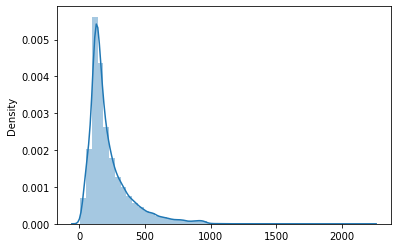

In [42]:
sn.distplot( num_tokens );

In [43]:
mean_num_tokens = num_tokens.mean()
std_num_tokens = num_tokens.std()

In [44]:
mean_num_tokens

224.05292

In [45]:
std_num_tokens

164.12699046614364

if we assume that legnth chosen should address 95% of the sentences, then we can take 2 standard deviation of the mean length.

In [46]:
max_review_length = int(mean_num_tokens + 2 * std_num_tokens)

In [47]:
max_review_length

552

How many sentences will not be truncated at all?

In [48]:
np.sum(num_tokens < max_review_length) / len(num_tokens)

0.94524

Almost 95%.

Now we will pad or truncate. But padding or truncating can be done at the beginning of the sentence or at the end of the sentences. *pre* or *post* can be used to specify the padding and truncating the beginning or end of sentence.

In [49]:
from tensorflow.keras.preprocessing.sequence import pad_sequences 

In [50]:
pad = 'pre'

In [51]:
X = pad_sequences(sequences, 
                  max_review_length, 
                  padding=pad, 
                  truncating=pad)

In [52]:
X[0:1]

array([[   0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,   16,   29,   11,  535, 

### Split Datasets

In [53]:
from sklearn.model_selection import train_test_split

In [54]:
X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y, 
                                                    test_size = 0.2,
                                                    random_state = 80)

In [55]:
X_train.shape

(20000, 552)

In [56]:
X_test.shape

(5000, 552)

In [57]:
input_shape = X_train.shape

In [41]:
input_shape

(20000, 552)

### Bag Of Words Model

#### Model Architecture

(Bag of words) -> Dense Layer(1024) -> Dense Layer(256) -> Dense Layer(128) -> Dense Layer(64) -> Relu -> Dense Layer(1) -> Sigmoid

In [60]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense, Activation

In [43]:
tf.keras.backend.clear_session()  # clear default graph

bow_model = Sequential()

bow_model.add(Dense(1024, input_shape=(input_shape[1],)))
bow_model.add(Activation('relu'))
# An "activation" is just a non-linear function applied to the output
# of the layer above. Here, with a "rectified linear unit",
# we clamp all values below 0 to 0.
bow_model.add(Dense(256))
bow_model.add(Activation('relu'))
bow_model.add(Dense(128))
bow_model.add(Activation('relu'))
bow_model.add(Dense(64))
bow_model.add(Activation('relu'))
bow_model.add(Dense(1))
# This special "softmax" activation among other things,
# ensures the output is a valid probaility distribution, that is
# that its values are all non-negative and sum to 1.
bow_model.add(Activation('sigmoid'))

In [ ]:
bow_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 1024)              566272    
_________________________________________________________________
activation (Activation)      (None, 1024)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 256)               262400    
_________________________________________________________________
activation_1 (Activation)    (None, 256)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 128)               32896     
_________________________________________________________________
activation_2 (Activation)    (None, 128)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 64)                8

In [44]:
bow_model.compile(loss='binary_crossentropy', 
              optimizer='rmsprop', 
              metrics=['accuracy'])

In [45]:
EPOCHS = 10
BATCH_SIZE = 256

In [46]:
%%time 
# fit model
bow_history = bow_model.fit(
    X_train, 
    y_train,  # prepared data
    batch_size = BATCH_SIZE,
    epochs = EPOCHS,
    validation_data = (X_test, y_test),
    shuffle = True,
    verbose=1,
)

Epoch 1/10
79/79 [==============================] - 5s 43ms/step - loss: 60.5241 - accuracy: 0.4990 - val_loss: 3.3973 - val_accuracy: 0.4978
Epoch 2/10
79/79 [==============================] - 3s 40ms/step - loss: 3.2828 - accuracy: 0.5232 - val_loss: 2.2035 - val_accuracy: 0.5108
Epoch 3/10
79/79 [==============================] - 3s 40ms/step - loss: 1.3583 - accuracy: 0.5372 - val_loss: 1.2068 - val_accuracy: 0.4980
Epoch 4/10
79/79 [==============================] - 3s 40ms/step - loss: 0.8650 - accuracy: 0.5682 - val_loss: 1.4655 - val_accuracy: 0.5082
Epoch 5/10
79/79 [==============================] - 3s 40ms/step - loss: 0.7497 - accuracy: 0.5973 - val_loss: 0.9037 - val_accuracy: 0.5062
Epoch 6/10
79/79 [==============================] - 3s 40ms/step - loss: 0.6606 - accuracy: 0.6495 - val_loss: 1.0271 - val_accuracy: 0.4960
Epoch 7/10
79/79 [==============================] - 3s 41ms/step - loss: 0.5470 - accuracy: 0.7344 - val_loss: 1.1384 - val_accuracy: 0.4996
Epoch 8/10
7

### Using Embeddings

In Word embeddings, words are represented by a vector i.e. series of numbers (weights). The vectors represent words in a N dimension space, in which similar meaning words are places nearer to each other while the dissimilar words are kept far. The dimensions in the space represent some latent factors, by which the words could be defined. All words are assigned some weights in each each latent factors. Words that share some common meaning have similar weights across common factors.

The word embeddings weights can be estimated during the NN model building. There are also pre-built word embeddings are available, which can be used in the model. We will discuss about the pre-built word embeddings later in the tutorial.

Word embeddings are commonly used in many Natural Language Processing (NLP) tasks because they are found to be useful representations of words and often lead to better performance in the various tasks performed. Given its widespread use, this post seeks to introduce the concept of word embeddings to the prospective NLP practitioner.

Here are couple of good references to understand embeddings

https://medium.com/huggingface/universal-word-sentence-embeddings-ce48ddc8fc3a

(Bag of words) -> Embeddings (8) -> Dense Layer(16) ->  Relu -> Dense Layer(1) -> Sigmoid

In [61]:
from tensorflow.keras.layers import Embedding
from tensorflow.keras.optimizers import SGD

In [62]:
tf.keras.backend.clear_session()  # clear default graph

emb_model = Sequential()
# We specify the maximum input length to our Embedding layer
# so we can later flatten the embedded inputs
emb_model.add(Embedding(num_words, 8, input_length=max_review_length))
# After the Embedding layer, 
# our activations have shape `(samples, maxlen, 8)`.

# We flatten the 3D tensor of embeddings 
# into a 2D tensor of shape `(samples, maxlen * 8)`
emb_model.add(Flatten())

emb_model.add(Dense(128))
emb_model.add(Activation('relu'))

# We add the classifier on top
emb_model.add(Dense(1))
emb_model.add(Activation('sigmoid'))

In [63]:
emb_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 552, 8)            80000     
                                                                 
 flatten (Flatten)           (None, 4416)              0         
                                                                 
 dense (Dense)               (None, 128)               565376    
                                                                 
 activation (Activation)     (None, 128)               0         
                                                                 
 dense_1 (Dense)             (None, 1)                 129       
                                                                 
 activation_1 (Activation)   (None, 1)                 0         
                                                                 
Total params: 645,505
Trainable params: 645,505
Non-trai

In [64]:
sgd = SGD(lr=0.01, momentum=0.8)

emb_model.compile(optimizer=sgd, 
              loss='binary_crossentropy', 
              metrics=['accuracy'])

emb_history = emb_model.fit(X_train, 
                    y_train,
                    epochs=20,
                    batch_size=32,
                    validation_split=0.3)

Epoch 1/20


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


438/438 [==============================] - 5s 4ms/step - loss: 0.6931 - accuracy: 0.5121 - val_loss: 0.6922 - val_accuracy: 0.5183
Epoch 2/20
438/438 [==============================] - 2s 4ms/step - loss: 0.6905 - accuracy: 0.5343 - val_loss: 0.6918 - val_accuracy: 0.5175
Epoch 3/20
438/438 [==============================] - 2s 4ms/step - loss: 0.6856 - accuracy: 0.5695 - val_loss: 0.6821 - val_accuracy: 0.5995
Epoch 4/20
438/438 [==============================] - 2s 4ms/step - loss: 0.6636 - accuracy: 0.6401 - val_loss: 0.6435 - val_accuracy: 0.6630
Epoch 5/20
438/438 [==============================] - 2s 4ms/step - loss: 0.5932 - accuracy: 0.7069 - val_loss: 0.5671 - val_accuracy: 0.7105
Epoch 6/20
438/438 [==============================] - 2s 4ms/step - loss: 0.4989 - accuracy: 0.7671 - val_loss: 0.4818 - val_accuracy: 0.7713
Epoch 7/20
438/438 [==============================] - 2s 4ms/step - loss: 0.4173 - accuracy: 0.8166 - val_loss: 0.4534 - val_accuracy: 0.7832
Epoch 8/20
438/43

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sn
%matplotlib inline

In [ ]:
def plot_accuracy(hist):
    plt.plot(hist['accuracy'])
    plt.plot(hist['val_accuracy'])
    plt.title('model accuracy')
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(['train', 
                'test'], 
               loc='upper left')
    plt.show()
    
def plot_loss(hist):
    plt.plot(hist['loss'])
    plt.plot(hist['val_loss'])
    plt.title('model loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train', 
                'test'], 
               loc='upper left')
    plt.show()    

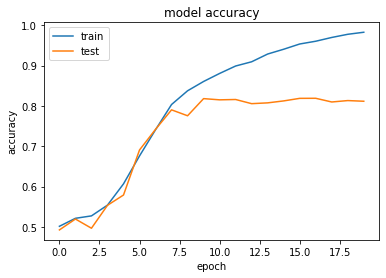

In [ ]:
plot_accuracy( emb_history.history )

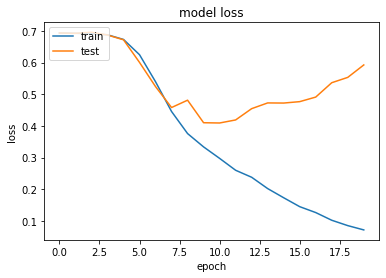

In [ ]:
plot_loss( emb_history.history )

#### Conclusion:

The model is overfitting. The training accuracy is about 98%, whereas the validation accuracy is 80%.

### Model 3

We will try another optimizers before applying regularization (dropouts). We will also add callbacks for reducing LR and early stopping. And store tensorflow logs for monitoring.

In [ ]:
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping, ModelCheckpoint
from tensorflow.keras.callbacks import TensorBoard

In [ ]:
callbacks_list = [ReduceLROnPlateau(monitor='val_loss',
                                    factor=0.1, 
                                    patience=3),
                 EarlyStopping(monitor='val_loss',
                               patience=4),
                 ModelCheckpoint(filepath='imdb_model.h5',
                                 monitor='val_loss',
                                 save_best_only=True),
                 TensorBoard("./imdb_logs")]

In [ ]:
tf.keras.backend.clear_session()  # clear default graph

emb_model_3 = Sequential()
# We specify the maximum input length to our Embedding layer
# so we can later flatten the embedded inputs
emb_model_3.add(Embedding(10000, 8, input_length=max_review_length))
# After the Embedding layer, 
# our activations have shape `(samples, maxlen, 8)`.

# We flatten the 3D tensor of embeddings 
# into a 2D tensor of shape `(samples, maxlen * 8)`
emb_model_3.add(Flatten())

emb_model_3.add(Dense(16))
emb_model_3.add(Activation('relu'))

# We add the classifier on top
emb_model_3.add(Dense(1))
emb_model_3.add(Activation('sigmoid'))

emb_model_3.compile(optimizer="adam", 
              loss='binary_crossentropy', 
              metrics=['accuracy'])

emb_history_3 = emb_model_3.fit(X_train, 
                                y_train,
                                epochs=20,
                                batch_size=32,
                                callbacks=callbacks_list,
                                validation_split=0.3)

Epoch 1/20
  1/438 [..............................] - ETA: 0s - loss: 0.6930 - accuracy: 0.4688WARNING:tensorflow:From /opt/anaconda3/envs/trainingnew/lib/python3.8/site-packages/tensorflow/python/ops/summary_ops_v2.py:1277: stop (from tensorflow.python.eager.profiler) is deprecated and will be removed after 2020-07-01.
Instructions for updating:
use `tf.profiler.experimental.stop` instead.
438/438 [==============================] - 1s 2ms/step - loss: 0.5942 - accuracy: 0.6336 - val_loss: 0.3292 - val_accuracy: 0.8608
Epoch 2/20
438/438 [==============================] - 1s 2ms/step - loss: 0.2185 - accuracy: 0.9150 - val_loss: 0.2967 - val_accuracy: 0.8762
Epoch 3/20
438/438 [==============================] - 1s 2ms/step - loss: 0.0838 - accuracy: 0.9750 - val_loss: 0.3358 - val_accuracy: 0.8730
Epoch 4/20
438/438 [==============================] - 1s 2ms/step - loss: 0.0305 - accuracy: 0.9948 - val_loss: 0.4067 - val_accuracy: 0.8607
Epoch 5/20
438/438 [=============================

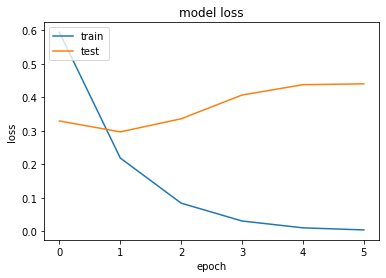

In [ ]:
plot_loss( emb_history_3.history )

### Model 4

Add a dropout layer as a regularization layer for dealing with overfitting.

In [ ]:
from tensorflow.keras.layers import Dropout

tf.keras.backend.clear_session()  # clear default graph

emb_model_4 = Sequential()
# We specify the maximum input length to our Embedding layer
# so we can later flatten the embedded inputs
emb_model_4.add(Embedding(10000, 
                          8, 
                          input_length=max_review_length,
                          name='layer_embedding'))
# After the Embedding layer, 
# our activations have shape `(samples, maxlen, 8)`.

# We flatten the 3D tensor of embeddings 
# into a 2D tensor of shape `(samples, maxlen * 8)`
emb_model_4.add(Flatten())

emb_model_4.add(Dense(16))
emb_model_4.add(Activation('relu'))

emb_model_4.add(Dropout(0.8))

# We add the classifier on top
emb_model_4.add(Dense(1))
emb_model_4.add(Activation('sigmoid'))
emb_model_4.compile(optimizer="adam", 
              loss='binary_crossentropy', 
              metrics=['accuracy'])

emb_history_4 = emb_model_4.fit(X_train, 
                    y_train,
                    epochs=20,
                    batch_size=32,
                    callbacks = callbacks_list,
                    validation_split=0.3)

Epoch 1/20
438/438 [==============================] - 1s 2ms/step - loss: 0.6745 - accuracy: 0.5563 - val_loss: 0.5190 - val_accuracy: 0.7925
Epoch 2/20
438/438 [==============================] - 1s 2ms/step - loss: 0.4398 - accuracy: 0.7977 - val_loss: 0.3218 - val_accuracy: 0.8718
Epoch 3/20
438/438 [==============================] - 1s 2ms/step - loss: 0.3101 - accuracy: 0.8596 - val_loss: 0.3000 - val_accuracy: 0.8757
Epoch 4/20
438/438 [==============================] - 1s 2ms/step - loss: 0.2498 - accuracy: 0.8861 - val_loss: 0.3000 - val_accuracy: 0.8778
Epoch 5/20
438/438 [==============================] - 1s 2ms/step - loss: 0.2099 - accuracy: 0.9056 - val_loss: 0.3154 - val_accuracy: 0.8805
Epoch 6/20
438/438 [==============================] - 1s 2ms/step - loss: 0.1761 - accuracy: 0.9142 - val_loss: 0.3611 - val_accuracy: 0.8753
Epoch 7/20
438/438 [==============================] - 1s 2ms/step - loss: 0.1557 - accuracy: 0.9205 - val_loss: 0.3567 - val_accuracy: 0.8793
Epoch 

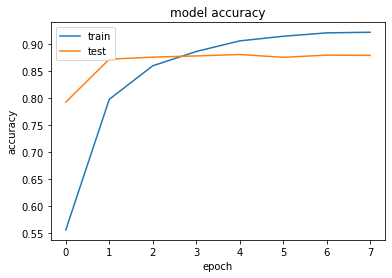

In [ ]:
plot_accuracy( emb_history_4.history )

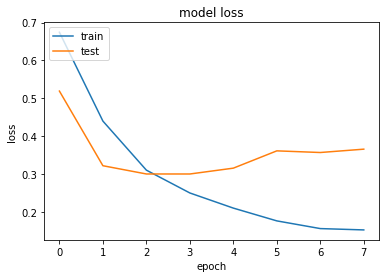

In [ ]:
plot_loss( emb_history_4.history )

### Model 5

Increase dropout rate from 0.8 to 0.9

In [ ]:
from tensorflow.keras.layers import Dropout

tf.keras.backend.clear_session()  # clear default graph

emb_model_5 = Sequential()
# We specify the maximum input length to our Embedding layer
# so we can later flatten the embedded inputs
emb_model_5.add(Embedding(10000, 8, input_length=max_review_length))
# After the Embedding layer, 
# our activations have shape `(samples, maxlen, 8)`.

# We flatten the 3D tensor of embeddings 
# into a 2D tensor of shape `(samples, maxlen * 8)`
emb_model_5.add(Flatten())

emb_model_5.add(Dense(16))
emb_model_5.add(Activation('relu'))

emb_model_5.add(Dropout(0.9))

# We add the classifier on top
emb_model_5.add(Dense(1))
emb_model_5.add(Activation('sigmoid'))
emb_model_5.compile(optimizer="adam", 
              loss='binary_crossentropy', 
              metrics=['accuracy'])

emb_history_5 = emb_model_5.fit(X_train, 
                                y_train,
                                epochs=20,
                                batch_size=32,
                                callbacks = callbacks_list,
                                validation_split=0.3)

Epoch 1/20
438/438 [==============================] - 1s 2ms/step - loss: 0.6933 - accuracy: 0.5016 - val_loss: 0.6884 - val_accuracy: 0.5270
Epoch 2/20
438/438 [==============================] - 1s 2ms/step - loss: 0.6201 - accuracy: 0.6141 - val_loss: 0.4546 - val_accuracy: 0.8562
Epoch 3/20
438/438 [==============================] - 1s 2ms/step - loss: 0.4856 - accuracy: 0.7123 - val_loss: 0.3631 - val_accuracy: 0.8740
Epoch 4/20
438/438 [==============================] - 1s 2ms/step - loss: 0.4377 - accuracy: 0.7388 - val_loss: 0.3203 - val_accuracy: 0.8812
Epoch 5/20
438/438 [==============================] - 1s 2ms/step - loss: 0.4112 - accuracy: 0.7429 - val_loss: 0.3019 - val_accuracy: 0.8773
Epoch 6/20
438/438 [==============================] - 1s 2ms/step - loss: 0.3830 - accuracy: 0.7581 - val_loss: 0.3230 - val_accuracy: 0.8623
Epoch 7/20
438/438 [==============================] - 1s 2ms/step - loss: 0.3691 - accuracy: 0.7599 - val_loss: 0.3024 - val_accuracy: 0.8773
Epoch 

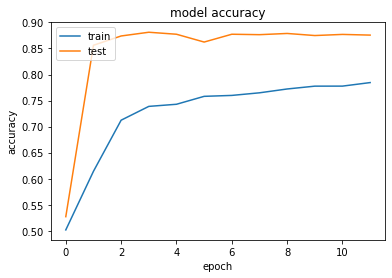

In [ ]:
plot_accuracy( emb_history_5.history )

### Checking performance on test set

We will use the model 4 for checking performance on test set and making predictions.

In [ ]:
emb_model_4.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
layer_embedding (Embedding)  (None, 552, 8)            80000     
_________________________________________________________________
flatten (Flatten)            (None, 4416)              0         
_________________________________________________________________
dense (Dense)                (None, 16)                70672     
_________________________________________________________________
activation (Activation)      (None, 16)                0         
_________________________________________________________________
dropout (Dropout)            (None, 16)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 17        
_________________________________________________________________
activation_1 (Activation)    (None, 1)                 0

In [ ]:
X_train

array([[   0,    0,    0, ...,    5, 1769,    9],
       [   0,    0,    0, ...,  245,  141,   27],
       [   0,    0,    0, ..., 1602,    5,  607],
       ...,
       [   0,    0,    0, ...,  699,    7,    7],
       [   0,    0,    0, ..., 1057,    7,    7],
       [   0,    0,    0, ...,    3, 2910, 3589]], dtype=int32)

In [ ]:
result = emb_model_4.evaluate(X_test, y_test)

157/157 [==============================] - 0s 767us/step - loss: 0.3562 - accuracy: 0.8800


In [ ]:
print("Accuracy: {0:.2%}".format(result[1]))

Accuracy: 88.00%


### Predicting Test Data and Confusion Matrix

We will predict the classes using model 4 and build the confusion matrix to understand precision and recall.

In [77]:
emb_model.predict(X_test)

array([[7.4884391e-01],
       [1.9966106e-01],
       [1.4559743e-05],
       ...,
       [7.2386026e-01],
       [7.7878636e-01],
       [9.9473393e-01]], dtype=float32)

In [78]:
y_pred = (emb_model.predict(X_test) > 0.5).astype("int32")

In [79]:
y_pred[0:10]

array([[1],
       [0],
       [0],
       [0],
       [1],
       [1],
       [0],
       [1],
       [1],
       [1]], dtype=int32)

In [80]:
from sklearn import metrics

cm = metrics.confusion_matrix( y_test,
                               y_pred, labels = [1,0] )

In [81]:
cm

array([[2153,  390],
       [ 528, 1929]])

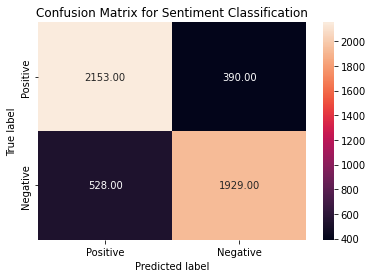

In [82]:
sn.heatmap(cm, annot=True,  
           fmt='.2f', 
           xticklabels = ["Positive", "Negative"] , 
           yticklabels = ["Positive", "Negative"] )

plt.ylabel('True label')
plt.xlabel('Predicted label');
plt.title( 'Confusion Matrix for Sentiment Classification');

In [83]:
from sklearn.metrics import classification_report

In [85]:
print( classification_report(y_test, 
                             y_pred))

              precision    recall  f1-score   support

           0       0.83      0.79      0.81      2457
           1       0.80      0.85      0.82      2543

    accuracy                           0.82      5000
   macro avg       0.82      0.82      0.82      5000
weighted avg       0.82      0.82      0.82      5000



### Peeping into Embeddings

We will look at the embeddings estimated for different words and if they are placed neared or far as per their meaning.

In [92]:
layer_embedding = emb_model.get_layer('embedding')

In [90]:
weights_embedding = layer_embedding.get_weights()[0]

In [91]:
weights_embedding.shape

(10000, 8)

In [93]:
def get_embeddings( word ):
    token = tokenizer.word_index[word]
    return weights_embedding[token]

In [94]:
good = get_embeddings('good')
good

array([ 0.07020234,  0.07174408,  0.07068259,  0.18358316, -0.07272266,
        0.04855254, -0.11849979, -0.25927702], dtype=float32)

In [95]:
great = get_embeddings('great')
great

array([ 0.3146793 ,  0.20434995, -0.01456563,  0.15662667, -0.18867615,
       -0.10087201,  0.34895915,  0.08293767], dtype=float32)

In [96]:
bad = get_embeddings('bad')
bad

array([-0.3189235 , -0.1241252 ,  0.07735486, -0.26591355,  0.19117677,
        0.03973016, -0.47308773, -0.0588959 ], dtype=float32)

In [97]:
terrible = get_embeddings('terrible')
terrible

array([-0.36416766, -0.27852803, -0.0440857 , -0.29760948,  0.00068893,
        0.09784431, -0.18091549,  0.05142877], dtype=float32)

We will calculate the euclidean distance between the word embeddings.

In [98]:
from scipy.spatial.distance import cdist

In [99]:
def get_distance( word1, word2 ):
    
    word1_token = tokenizer.word_index[word1]
    word2_token = tokenizer.word_index[word2]    
    
    return cdist([weights_embedding[word1_token]], 
                 [weights_embedding[word2_token]], 
                 metric = 'euclidean')

In [100]:
get_distance( 'good', 
             'great' )

array([[0.67583198]])

In [101]:
get_distance( 'good', 'bad' )

array([[0.79213726]])

In [102]:
get_distance( 'terrible', 'bad' )

array([[0.42289329]])

In [103]:
get_distance( 'good', 'terrible' )

array([[0.81506976]])

In [104]:
get_distance( 'great', 'terrible' )

array([[1.12174574]])

It can be observed that the words *good* and *great* are places together, while *bad* and *terrible* are place together. And the words *good* and *terrible* are place far. This indicates the embeddings have incorporated the meaning of the words as per how they are used in the sentences expressing positive and negative sentiments.

Some more examples expressing sentiments.

In [105]:
get_distance('wonderful','awesome')

array([[0.25942775]])

In [106]:
get_distance('wonderful','pathetic')

array([[0.79700228]])

In [107]:
get_distance('awesome','pathetic')

array([[0.63205022]])

## Applying Pre trained embeddings

Word embeddings are generally computed using word-occurrence statistics (observations about what words co-occur in sentences or documents), using a variety of  techniques, some involving neural networks, others not. The idea of a dense, lowdimensional embedding space for words, computed in an unsupervised way, was initially explored by Bengio et al. in the early 2000s,1 but it only started to take off in research and industry applications after the release of one of the most famous and successful word-embedding schemes: the Word2vec algorithm (https://code.google.com/ archive/p/word2vec), developed by Tomas Mikolov at Google in 2013. Word2vec dimensions capture specific semantic properties, such as gender.

There are various precomputed databases of word embeddings that you can download and use in a Keras Embedding layer. Word2vec is one of them. Another popular one is called Global Vectors for Word Representation (GloVe, https://nlp.stanford.edu/projects/glove), which was developed by Stanford researchers in 2014. This embedding technique is based on factorizing a matrix of word co-occurrence statistics. Its developers have made available precomputed embeddings for millions of English tokens, obtained from Wikipedia data and Common Crawl data.

One of the most widely used pretrained word embeddings is Glove and can be downloaded from https://nlp.stanford.edu/projects/glove/ 

GloVe is pre-computed embeddings from 2014 English Wikipedia. It's a 822MB zip file named glove.6B.zip, containing 100-dimensional embedding vectors for 400,000 words (or non-word tokens).

In [108]:
!wget https://nlp.stanford.edu/data/glove.6B.zip

--2022-09-16 07:35:27--  https://nlp.stanford.edu/data/glove.6B.zip
Resolving nlp.stanford.edu (nlp.stanford.edu)... 171.64.67.140
Connecting to nlp.stanford.edu (nlp.stanford.edu)|171.64.67.140|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://downloads.cs.stanford.edu/nlp/data/glove.6B.zip [following]
--2022-09-16 07:35:27--  https://downloads.cs.stanford.edu/nlp/data/glove.6B.zip
Resolving downloads.cs.stanford.edu (downloads.cs.stanford.edu)... 171.64.64.22
Connecting to downloads.cs.stanford.edu (downloads.cs.stanford.edu)|171.64.64.22|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 862182613 (822M) [application/zip]
Saving to: ‘glove.6B.zip’

glove.6B.zip        100%[===================>] 822.24M  4.94MB/s    in 2m 43s  

2022-09-16 07:38:11 (5.05 MB/s) - ‘glove.6B.zip’ saved [862182613/862182613]



In [109]:
!unzip glove*.zip

Archive:  glove.6B.zip
  inflating: glove.6B.50d.txt        
  inflating: glove.6B.100d.txt       
  inflating: glove.6B.200d.txt       
  inflating: glove.6B.300d.txt       


In [163]:
!head -20 /content/glove.6B.50d.txt

the 0.418 0.24968 -0.41242 0.1217 0.34527 -0.044457 -0.49688 -0.17862 -0.00066023 -0.6566 0.27843 -0.14767 -0.55677 0.14658 -0.0095095 0.011658 0.10204 -0.12792 -0.8443 -0.12181 -0.016801 -0.33279 -0.1552 -0.23131 -0.19181 -1.8823 -0.76746 0.099051 -0.42125 -0.19526 4.0071 -0.18594 -0.52287 -0.31681 0.00059213 0.0074449 0.17778 -0.15897 0.012041 -0.054223 -0.29871 -0.15749 -0.34758 -0.045637 -0.44251 0.18785 0.0027849 -0.18411 -0.11514 -0.78581
, 0.013441 0.23682 -0.16899 0.40951 0.63812 0.47709 -0.42852 -0.55641 -0.364 -0.23938 0.13001 -0.063734 -0.39575 -0.48162 0.23291 0.090201 -0.13324 0.078639 -0.41634 -0.15428 0.10068 0.48891 0.31226 -0.1252 -0.037512 -1.5179 0.12612 -0.02442 -0.042961 -0.28351 3.5416 -0.11956 -0.014533 -0.1499 0.21864 -0.33412 -0.13872 0.31806 0.70358 0.44858 -0.080262 0.63003 0.32111 -0.46765 0.22786 0.36034 -0.37818 -0.56657 0.044691 0.30392
. 0.15164 0.30177 -0.16763 0.17684 0.31719 0.33973 -0.43478 -0.31086 -0.44999 -0.29486 0.16608 0.11963 -0.41328 -0.42353

In [111]:
from gensim.test.utils import datapath, get_tmpfile
from gensim.models import KeyedVectors
from gensim.scripts.glove2word2vec import glove2word2vec

In [112]:
glove_file = datapath('/content/glove.6B.100d.txt')
word2vec_glove_file = get_tmpfile("glove.6B.100d.word2vec.txt")
glove2word2vec(glove_file, word2vec_glove_file)

(400000, 100)

In [113]:
model = KeyedVectors.load_word2vec_format(word2vec_glove_file)

In [152]:
model.most_similar('dhoni')

[('yuvraj', 0.8215702772140503),
 ('dravid', 0.8074445724487305),
 ('raina', 0.7764849066734314),
 ('laxman', 0.7619553804397583),
 ('sehwag', 0.7574127912521362),
 ('gambhir', 0.7569947242736816),
 ('mahendra', 0.7568572759628296),
 ('kumble', 0.7551264762878418),
 ('harbhajan', 0.7499918937683105),
 ('tendulkar', 0.7379781007766724)]

In [168]:
model.most_similar('india')

[('pakistan', 0.8370324373245239),
 ('indian', 0.780203104019165),
 ('delhi', 0.7712194919586182),
 ('bangladesh', 0.7661640644073486),
 ('lanka', 0.7639288306236267),
 ('sri', 0.7506585121154785),
 ('australia', 0.7042096853256226),
 ('malaysia', 0.6796302795410156),
 ('nepal', 0.6761943697929382),
 ('thailand', 0.6671633720397949)]

In [115]:
def analogy(x1, x2, y1):
    result = model.most_similar([y1, x2], [x1])
    return result[0][0]

In [171]:
analogy('india', 'indian', 'germany')

'german'

In [172]:
analogy('switzerland', 'federer', 'spain')

'nadal'

In [125]:
analogy('tall', 'tallest', 'long')

'longest'

In [134]:
analogy('summer', 'hot', 'winter')

'cold'

In [161]:
analogy('india', 'delhi', 'france')

'paris'

In [175]:
analogy('earth', 'moon', 'jupiter')

'moons'

In [207]:
import os

glove_dir = '/content'

embeddings_index = {}
f = open(os.path.join(glove_dir, 'glove.6B.100d.txt'))
line_num = 0

for line in f:
    ## The following code is done for printing the first line 
    if( line_num == 0):
        print( line )
        line_num += 1
    values = line.split()
    word = values[0]
    coefs = np.asarray(values[1:], dtype='float32')
    embeddings_index[word] = coefs
f.close()

print('Found %s word vectors.' % len(embeddings_index))

the -0.038194 -0.24487 0.72812 -0.39961 0.083172 0.043953 -0.39141 0.3344 -0.57545 0.087459 0.28787 -0.06731 0.30906 -0.26384 -0.13231 -0.20757 0.33395 -0.33848 -0.31743 -0.48336 0.1464 -0.37304 0.34577 0.052041 0.44946 -0.46971 0.02628 -0.54155 -0.15518 -0.14107 -0.039722 0.28277 0.14393 0.23464 -0.31021 0.086173 0.20397 0.52624 0.17164 -0.082378 -0.71787 -0.41531 0.20335 -0.12763 0.41367 0.55187 0.57908 -0.33477 -0.36559 -0.54857 -0.062892 0.26584 0.30205 0.99775 -0.80481 -3.0243 0.01254 -0.36942 2.2167 0.72201 -0.24978 0.92136 0.034514 0.46745 1.1079 -0.19358 -0.074575 0.23353 -0.052062 -0.22044 0.057162 -0.15806 -0.30798 -0.41625 0.37972 0.15006 -0.53212 -0.2055 -1.2526 0.071624 0.70565 0.49744 -0.42063 0.26148 -1.538 -0.30223 -0.073438 -0.28312 0.37104 -0.25217 0.016215 -0.017099 -0.38984 0.87424 -0.72569 -0.51058 -0.52028 -0.1459 0.8278 0.27062

Found 400000 word vectors.


Get the word indexes from the our tokenizer, which contains the indexes of the words in our corpus.

In [208]:
word_index = tokenizer.word_index

In [209]:
embedding_dim = 100 #This is because we have downloaded GloVec for 100d embeddings
max_words = 10000

### The embedding matrix will have 
embedding_matrix = np.zeros((max_words, 
                             embedding_dim))

for word, i in word_index.items():
    embedding_vector = embeddings_index.get(word)
    if i < max_words:
        if embedding_vector is not None:
            # Words not found in embedding index will be all-zeros.
            embedding_matrix[i] = embedding_vector


### Embedding Model

In [181]:
tf.keras.backend.clear_session()  # clear default graph

pre_trained_emb_model = Sequential()
pre_trained_emb_model.add(Embedding(max_words, 
                                    embedding_dim, 
                                    input_length=max_review_length))
pre_trained_emb_model.add(Flatten())
pre_trained_emb_model.add(Dense(32, activation='relu'))
pre_trained_emb_model.add(Dense(1, activation='sigmoid'))
pre_trained_emb_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 552, 100)          1000000   
                                                                 
 flatten (Flatten)           (None, 55200)             0         
                                                                 
 dense (Dense)               (None, 32)                1766432   
                                                                 
 dense_1 (Dense)             (None, 1)                 33        
                                                                 
Total params: 2,766,465
Trainable params: 2,766,465
Non-trainable params: 0
_________________________________________________________________


The Embedding layer has a single weight matrix: a 2D float matrix where each entry *i* is the word vector meant to be associated with index i. Simple enough. Let's just load the GloVe matrix we prepared into our Embedding layer, the first layer in our model:

Additionally, we freeze the embedding layer (we set its trainable attribute to False), following the same rationale as what you are already familiar with in the context of pre-trained convnet features: when parts of a model are pre-trained (like our Embedding layer), and parts are randomly initialized (like our classifier), the pre-trained parts should not be updated during training to avoid forgetting what they already know. The large gradient update triggered by the randomly initialized layers would be very disruptive to the already learned features.

In [182]:
pre_trained_emb_model.layers[0].set_weights([embedding_matrix])
pre_trained_emb_model.layers[0].trainable = False

In [183]:
pre_trained_emb_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 552, 100)          1000000   
                                                                 
 flatten (Flatten)           (None, 55200)             0         
                                                                 
 dense (Dense)               (None, 32)                1766432   
                                                                 
 dense_1 (Dense)             (None, 1)                 33        
                                                                 
Total params: 2,766,465
Trainable params: 1,766,465
Non-trainable params: 1,000,000
_________________________________________________________________


In [187]:
#callbacks_list = [ReduceLROnPlateau(monitor='val_loss',
#                                    factor=0.1, 
#                                    patience=3),
#                 EarlyStopping(monitor='val_loss',
#                               patience=4),
#                 ModelCheckpoint(filepath='imdb_pretrained_model.h5',
#                                 monitor='val_loss',
#                                 save_best_only=True),
#                 TensorBoard("./imdb_pretrained_logs")]

In [186]:
pre_trained_emb_model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])

pre_trained_emb_history = pre_trained_emb_model.fit(X_train, 
                                                    y_train,
                                                    epochs=20,
                                                    batch_size=256,
#                                                    callbacks = callbacks_list,
                                                    validation_split=0.1)

Epoch 1/20
71/71 [==============================] - 1s 5ms/step - loss: 0.1933 - accuracy: 0.9380 - val_loss: 0.6900 - val_accuracy: 0.7165
Epoch 2/20
71/71 [==============================] - 0s 4ms/step - loss: 0.1588 - accuracy: 0.9416 - val_loss: 0.6902 - val_accuracy: 0.7325
Epoch 3/20
71/71 [==============================] - 0s 4ms/step - loss: 0.1318 - accuracy: 0.9544 - val_loss: 0.7059 - val_accuracy: 0.7265
Epoch 4/20
71/71 [==============================] - 0s 4ms/step - loss: 0.1219 - accuracy: 0.9588 - val_loss: 1.2620 - val_accuracy: 0.6285
Epoch 5/20
71/71 [==============================] - 0s 4ms/step - loss: 0.1123 - accuracy: 0.9624 - val_loss: 1.1094 - val_accuracy: 0.6590
Epoch 6/20
71/71 [==============================] - 0s 4ms/step - loss: 0.1062 - accuracy: 0.9626 - val_loss: 0.8201 - val_accuracy: 0.7140
Epoch 7/20
71/71 [==============================] - 0s 4ms/step - loss: 0.0950 - accuracy: 0.9687 - val_loss: 0.8526 - val_accuracy: 0.7100
Epoch 8/20
71/71 [==

### Embedding Layer with Dropouts

In [189]:
from tensorflow.keras.layers import Dropout

In [216]:
Dropout?

In [213]:
tf.keras.backend.clear_session()  # clear default graph

pre_trained_emb_model = Sequential()
pre_trained_emb_model.add(Embedding(max_words, 
                                    embedding_dim, 
                                    input_length=max_review_length))
pre_trained_emb_model.add(Flatten())
pre_trained_emb_model.add(Dense(256))
pre_trained_emb_model.add(Activation('relu'))
pre_trained_emb_model.add(Dropout(0.2))

pre_trained_emb_model.add(Dense(1))
pre_trained_emb_model.add(Activation('sigmoid'))
pre_trained_emb_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 552, 100)          1000000   
                                                                 
 flatten (Flatten)           (None, 55200)             0         
                                                                 
 dense (Dense)               (None, 256)               14131456  
                                                                 
 activation (Activation)     (None, 256)               0         
                                                                 
 dropout (Dropout)           (None, 256)               0         
                                                                 
 dense_1 (Dense)             (None, 1)                 257       
                                                                 
 activation_1 (Activation)   (None, 1)                 0

In [214]:
pre_trained_emb_model.layers[0].set_weights([embedding_matrix])
pre_trained_emb_model.layers[0].trainable = True

In [215]:
pre_trained_emb_model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])

pre_trained_emb_history = pre_trained_emb_model.fit(X_train, 
                                                    y_train,
                                                    epochs=30,
                                                    batch_size=256,
#                                                    callbacks=callbacks_list,
                                                    validation_split=0.2)

Epoch 1/30
63/63 [==============================] - 2s 19ms/step - loss: 1.7371 - accuracy: 0.5434 - val_loss: 0.6781 - val_accuracy: 0.5970
Epoch 2/30
63/63 [==============================] - 1s 16ms/step - loss: 0.7367 - accuracy: 0.5853 - val_loss: 0.6466 - val_accuracy: 0.5953
Epoch 3/30
63/63 [==============================] - 1s 15ms/step - loss: 0.6536 - accuracy: 0.6538 - val_loss: 0.5448 - val_accuracy: 0.7502
Epoch 4/30
63/63 [==============================] - 1s 16ms/step - loss: 0.5576 - accuracy: 0.7257 - val_loss: 0.4660 - val_accuracy: 0.7800
Epoch 5/30
63/63 [==============================] - 1s 15ms/step - loss: 0.4811 - accuracy: 0.7756 - val_loss: 0.5364 - val_accuracy: 0.7377
Epoch 6/30
63/63 [==============================] - 1s 15ms/step - loss: 0.4242 - accuracy: 0.8144 - val_loss: 0.5119 - val_accuracy: 0.7617
Epoch 7/30
63/63 [==============================] - 1s 15ms/step - loss: 0.3606 - accuracy: 0.8491 - val_loss: 0.5437 - val_accuracy: 0.7760
Epoch 8/30
63

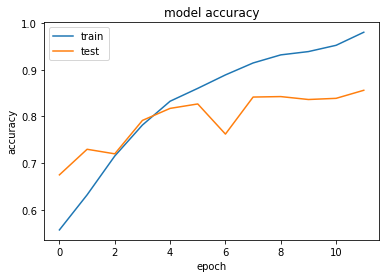

In [ ]:
plot_accuracy(pre_trained_emb_history.history)

In [217]:
X_test

array([[   0,    0,    0, ...,   17,    3,  744],
       [   0,    0,    0, ...,   37,   41,   39],
       [   0,    0,    0, ..., 1011,   15,    1],
       ...,
       [   0,    0,    0, ...,    1,  142, 1562],
       [   0,    0,    0, ...,    6, 4026,    9],
       [   0,    0,    0, ...,    2,  369,  947]], dtype=int32)

## Saving and loading the model

In [240]:
pre_trained_emb_model.save('sentiment.model')

In [242]:
from tensorflow import keras
model_v1 = keras.models.load_model('sentiment.model')

In [243]:
x_seq = tokenizer.texts_to_sequences( ["the movie is good, but it could have been better"])

In [244]:
x_seq

[[1, 17, 6, 49, 18, 9, 97, 25, 74, 125]]

In [245]:
x_pad = pad_sequences(x_seq, 
                  max_review_length, 
                  padding=pad, 
                  truncating=pad)


In [238]:
x_pad

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0

In [246]:
np.round(model_v1.predict(x_pad), 2)

array([[0.]], dtype=float32)

## Excellent References

For further exploration and better understanding, you can use the following references.

- Glossary of Deep Learning: Word Embedding

    https://medium.com/deeper-learning/glossary-of-deep-learning-word-embedding-f90c3cec34ca


- wevi: word embedding visual inspector

    https://ronxin.github.io/wevi/  
    
    
- Learning Word Embedding    

    https://lilianweng.github.io/lil-log/2017/10/15/learning-word-embedding.html


- On the contribution of neural networks and word embeddings in Natural Language Processing

    https://medium.com/@josecamachocollados/on-the-contribution-of-neural-networks-and-word-embeddings-in-natural-language-processing-c8bb1b85c61c